In [130]:


# ЗАВДАННЯ 1:



In [131]:
# Завдання 1.1: Завантажуємо вбудований датасет load_breast_cancer з бібліотеки sklearn.datasets

from sklearn.datasets import load_breast_cancer
import pandas as pd

# Завантажуємо дані
cancer = load_breast_cancer()

# Створюємо DataFrame
data = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data['target'] = cancer.target


In [132]:
# Завдання 1.2.1: Переглядаємо перші кілька рядків даних
data.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [133]:
# Завдання 1.2.2: Перевіряємо назви стовпців та типи даних
print("Назви стовпців:")
print(data.columns)

print("\nТипи даних:")
print(data.dtypes)


Назви стовпців:
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

Типи даних:
mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry

In [134]:
# Завдання 1.2.3: Перевіряємо наявність пропущених значень
print("Кількість пропущених значень у кожному стовпці:")
print(data.isnull().sum())


Кількість пропущених значень у кожному стовпці:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [135]:
# Завдання 1.2.4: Досліджуємо розмір даних
print("Розмір даних:")
print(data.shape)


Розмір даних:
(569, 31)


In [136]:
# Завдання 1.2(2).1: Розділяємо дані на навчальний і тестовий набори
from sklearn.model_selection import train_test_split

X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [137]:
# Завдання 1.2(2).2.1: Побудова моделі логістичної регресії та підбір оптимальних параметрів

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Створюємо пайплайн для масштабування даних та моделювання
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Визначаємо сітку параметрів для GridSearchCV
param_grid_lr = {
    'logreg__C': [0.1, 1, 10, 100],
    'logreg__solver': ['lbfgs', 'liblinear']
}

# Налаштовуємо GridSearchCV з пайплайном
grid_lr = GridSearchCV(pipeline, param_grid_lr, cv=5)
grid_lr.fit(X_train, y_train)

print("Найкращі параметри для логістичної регресії:", grid_lr.best_params_)

Найкращі параметри для логістичної регресії: {'logreg__C': 0.1, 'logreg__solver': 'liblinear'}


In [138]:
# Завдання 1.2(2).2.2: Побудова моделі дерева рішень та підбір оптимальних параметрів

from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10]}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

print("Найкращі параметри для дерева рішень:", grid_dt.best_params_)


Найкращі параметри для дерева рішень: {'max_depth': 5, 'min_samples_split': 10}


In [139]:
# Завдання 1.2(2).2.3: Побудова моделі випадкового лісу та підбір оптимальних параметрів

from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10], 'min_samples_split': [2, 5]}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

print("Найкращі параметри для випадкового лісу:", grid_rf.best_params_)


Найкращі параметри для випадкового лісу: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [140]:
# Завдання 1.3.1: Оцінка моделі логістичної регресії

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_lr = grid_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Точність логістичної регресії:", accuracy_lr)
print("Матриця помилок:")
print(confusion_matrix(y_test, y_pred_lr))
print("Звіт про класифікацію:")
print(classification_report(y_test, y_pred_lr))


Точність логістичної регресії: 0.9912280701754386
Матриця помилок:
[[42  1]
 [ 0 71]]
Звіт про класифікацію:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.99      1.00      0.99        71

    accuracy                           0.99       114
   macro avg       0.99      0.99      0.99       114
weighted avg       0.99      0.99      0.99       114



In [141]:
# Завдання 1.3.2: Оцінка моделі дерева рішень

y_pred_dt = grid_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Точність дерева рішень:", accuracy_dt)
print("Матриця помилок:")
print(confusion_matrix(y_test, y_pred_dt))
print("Звіт про класифікацію:")
print(classification_report(y_test, y_pred_dt))


Точність дерева рішень: 0.9385964912280702
Матриця помилок:
[[39  4]
 [ 3 68]]
Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        43
           1       0.94      0.96      0.95        71

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [142]:
# Завдання 1.3.3: Оцінка моделі випадкового лісу

y_pred_rf = grid_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Точність випадкового лісу:", accuracy_rf)
print("Матриця помилок:")
print(confusion_matrix(y_test, y_pred_rf))
print("Звіт про класифікацію:")
print(classification_report(y_test, y_pred_rf))


Точність випадкового лісу: 0.9649122807017544
Матриця помилок:
[[40  3]
 [ 1 70]]
Звіт про класифікацію:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [143]:
# Завдання 1.3(2): Порівняння точності моделей та вибір найкращої

print("Точність логістичної регресії:", accuracy_lr)
print("Точність дерева рішень:", accuracy_dt)
print("Точність випадкового лісу:", accuracy_rf)


Точність логістичної регресії: 0.9912280701754386
Точність дерева рішень: 0.9385964912280702
Точність випадкового лісу: 0.9649122807017544


In [144]:
# Завдання 1.4: Здійснюємо прогнозування найкращою моделлю

# Припустимо, що випадковий ліс показав найкращу точність
best_model = grid_rf
y_pred_best = y_pred_rf

print("Прогнозовані значення на тестовій вибірці:")
print(y_pred_best)

print("Реальні значення:")
print(y_test.values)

print("Прогнозовані значення найкращою моделлю:")
print(y_pred_best)


Прогнозовані значення на тестовій вибірці:
[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]
Реальні значення:
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]
Прогнозовані значення найкращою моделлю:
[1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


In [145]:


# Завдання 2



In [146]:
# Завдання 2.1: Завантажуємо датасет titanic.csv

import pandas as pd

data = pd.read_csv('titanic.csv')


In [147]:
# Завдання 2.2: Вивести перших 5 рядків

print(data.head())


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [148]:
# Завдання 2.3: Визначити розмір датасету

print("Розмір датасету:", data.shape)


Розмір датасету: (418, 12)


In [149]:
# Завдання 2.4: Визначити тип даних

print("Типи даних у датасеті:")
print(data.dtypes)


Типи даних у датасеті:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [150]:
# Завдання 2.5: Визначити наявність пропущених значень

print("Кількість пропущених значень у кожному стовпці:")
print(data.isnull().sum())


Кількість пропущених значень у кожному стовпці:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [151]:
# Завдання 2.6: Замінити пропущені значення на середнє значення

# Заповнюємо пропущені значення в 'Age' медіаною
data['Age'] = data['Age'].fillna(data['Age'].median())

# Заповнюємо пропущені значення в 'Embarked' модою
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])


In [152]:
# Завдання 2.7: Ще раз перевірити наявність пропущених значень

print("Кількість пропущених значень після заповнення:")
print(data.isnull().sum())


Кількість пропущених значень після заповнення:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [153]:
# Завдання 2.8: Перевірити наявність дублікатів

duplicates = data.duplicated().sum()
print("Кількість дублікатів:", duplicates)

# Видаляємо дублікати, якщо вони є
if duplicates > 0:
    data = data.drop_duplicates()


Кількість дублікатів: 0


In [154]:
# Завдання 2.9: Вивести описову статистику датасету

print(data.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   29.599282    0.447368   
std     120.810458    0.481622    0.841838   12.703770    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [155]:
# Завдання 2.10: Видалити стовпчик 'Cabin'

data.drop('Cabin', axis=1, inplace=True)


In [156]:
# Завдання 2.11: Сформувати датасет з обраними стовпцями

data = data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked']]


In [157]:
# Завдання 2.12: Замінити бінарні ознаки (Стать) на 0 і 1

# Перевіряємо унікальні значення в стовпці 'Sex'
print("Унікальні значення в стовпці 'Sex':", data['Sex'].unique())

# Замінюємо 'male' на 0, 'female' на 1
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})


Унікальні значення в стовпці 'Sex': ['male' 'female']


In [158]:
# Завдання 2.13: Ще раз перевірити кількість пропущених даних

print("Кількість пропущених значень після всіх операцій:")
print(data.isnull().sum())


Кількість пропущених значень після всіх операцій:
Survived    0
Pclass      0
Sex         0
Age         0
Fare        1
SibSp       0
Parch       0
Embarked    0
dtype: int64


In [159]:
# Завдання 2.14: Вивести 5 перших рядків датасету

print(data.head())


   Survived  Pclass  Sex   Age     Fare  SibSp  Parch Embarked
0         0       3    0  34.5   7.8292      0      0        Q
1         1       3    1  47.0   7.0000      1      0        S
2         0       2    0  62.0   9.6875      0      0        Q
3         0       3    0  27.0   8.6625      0      0        S
4         1       3    1  22.0  12.2875      1      1        S


In [160]:
# Завдання 2.15: Вивести 5 останніх рядків датасету

print(data.tail())


     Survived  Pclass  Sex   Age      Fare  SibSp  Parch Embarked
413         0       3    0  27.0    8.0500      0      0        S
414         1       1    1  39.0  108.9000      0      0        C
415         0       3    0  38.5    7.2500      0      0        S
416         0       3    0  27.0    8.0500      0      0        S
417         0       3    0  27.0   22.3583      1      1        C


In [161]:
# Завдання 2.16: Обчислити відсоток виживання для кожної статі

survival_by_sex = data.groupby('Sex')['Survived'].mean() * 100
print("Відсоток виживання за статтю:")
print(survival_by_sex)

# Висновок: Жінки мали вищий відсоток виживання


Відсоток виживання за статтю:
Sex
0      0.0
1    100.0
Name: Survived, dtype: float64


In [162]:
# Завдання 2.17: Обчислити відсоток виживання для кожного класу

survival_by_class = data.groupby('Pclass')['Survived'].mean() * 100
print("Відсоток виживання за класом:")
print(survival_by_class)

# Висновок: Пасажири 1-го класу мали найвищий рівень виживання


Відсоток виживання за класом:
Pclass
1    46.728972
2    32.258065
3    33.027523
Name: Survived, dtype: float64


In [163]:
# Завдання 2.18: Визначити середній вік тих, хто вижив, і тих, хто не вижив

average_age = data.groupby('Survived')['Age'].mean()
print("Середній вік за виживанням:")
print(average_age)

# Висновок: Вік впливав на виживання


Середній вік за виживанням:
Survived
0    29.522218
1    29.734145
Name: Age, dtype: float64


In [164]:
# Завдання 2.19: Розподіл пасажирів на групи за рівнями тарифів

# Створюємо новий стовпець 'FareBand' за допомогою pd.qcut()
data['FareBand'] = pd.qcut(data['Fare'], 4)

# Перетворюємо категорії інтервалів у числові коди
data['FareBand'] = data['FareBand'].cat.codes

# Аналізуємо відсоток виживання для кожної групи 'FareBand'
survival_by_fareband = data.groupby('FareBand')['Survived'].mean() * 100
print("Відсоток виживання за тарифними групами:")
print(survival_by_fareband)

# Висновок: Вищий тариф збільшував шанси на виживання


Відсоток виживання за тарифними групами:
FareBand
-1     0.000000
 0    26.315789
 1    27.083333
 2    39.047619
 3    53.921569
Name: Survived, dtype: float64


In [165]:
# Завдання 2.20: Визначити середній тариф для кожного класу

average_fare = data.groupby('Pclass')['Fare'].mean()
print("Середній тариф за класом:")
print(average_fare)

# Висновок: Існує значна різниця у тарифах між класами


Середній тариф за класом:
Pclass
1    94.280297
2    22.202104
3    12.459678
Name: Fare, dtype: float64


In [166]:
# Завдання 2.21: Обчислити середній вік пасажирів для кожного класу

average_age_by_class = data.groupby('Pclass')['Age'].mean()
print("Середній вік за класом:")
print(average_age_by_class)

# Висновок: Вік пасажирів відрізнявся за класами


Середній вік за класом:
Pclass
1    39.747664
2    28.681935
3    25.009541
Name: Age, dtype: float64


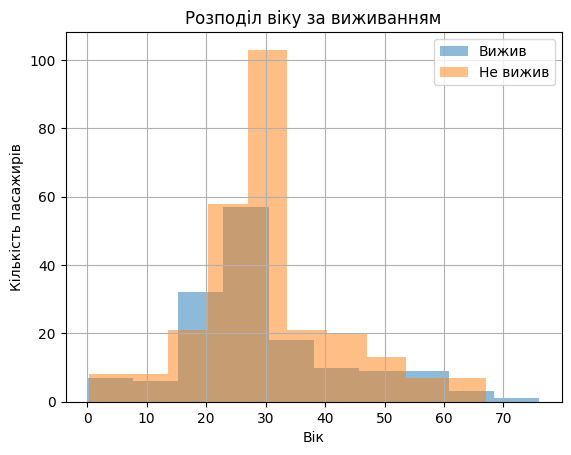

In [167]:
# Завдання 2.22: Побудувати гістограму розподілу віку

import matplotlib.pyplot as plt

# Розподіл віку для тих, хто вижив
data[data['Survived'] == 1]['Age'].hist(alpha=0.5, label='Вижив')

# Розподіл віку для тих, хто не вижив
data[data['Survived'] == 0]['Age'].hist(alpha=0.5, label='Не вижив')

plt.legend()
plt.xlabel('Вік')
plt.ylabel('Кількість пасажирів')
plt.title('Розподіл віку за виживанням')
plt.show()

# Висновок: Видимі відмінності у вікових групах


In [168]:
# Завдання 2.23: Обчислити відсоток виживання для кожної комбінації статі та класу

survival_by_sex_class = data.groupby(['Sex', 'Pclass'])['Survived'].mean() * 100
print("Відсоток виживання за статтю та класом:")
print(survival_by_sex_class)

# Висновок: Жінки в 1-му класі мали найвищий рівень виживання


Відсоток виживання за статтю та класом:
Sex  Pclass
0    1           0.0
     2           0.0
     3           0.0
1    1         100.0
     2         100.0
     3         100.0
Name: Survived, dtype: float64


In [169]:
# Завдання 2.24: Обчислити кореляцію між числовими змінними

# Включаємо 'FareBand' до списку числових змінних
correlation = data[['Survived', 'Pclass', 'Age', 'Fare', 'FareBand']].corr()
print("Кореляція між числовими змінними:")
print(correlation)

# Висновок: 'FareBand' та 'Pclass' мають значну кореляцію з виживанням


Кореляція між числовими змінними:
          Survived    Pclass       Age      Fare  FareBand
Survived  1.000000 -0.108615  0.008035  0.191514  0.221968
Pclass   -0.108615  1.000000 -0.467853 -0.577147 -0.717812
Age       0.008035 -0.467853  1.000000  0.347105  0.260219
Fare      0.191514 -0.577147  0.347105  1.000000  0.596240
FareBand  0.221968 -0.717812  0.260219  0.596240  1.000000


In [170]:

# 1. Перетворення категоріальних змінних
data['Sex'] = data['Sex'].astype(int)

# Використовуємо pd.get_dummies() для 'Embarked'
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

# 2. Видаляємо непотрібні стовпці (якщо такі є)
# У нашому випадку всі стовпці потрібні

# 3. Підготовка ознак та цільової змінної
X = data.drop(['Survived', 'FareBand'], axis=1)  # Видаляємо 'FareBand', якщо не плануємо його використовувати
y = data['Survived']

# 4. Перевірка типів даних
print("Типи даних у X:")
print(X.dtypes)


Типи даних у X:
Pclass          int64
Sex             int64
Age           float64
Fare          float64
SibSp           int64
Parch           int64
Embarked_Q       bool
Embarked_S       bool
dtype: object


In [171]:
# Розділяємо дані на навчальний і тестовий набори

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [174]:
# Завдання 2.25: Побудова моделі логістичної регресії та підбір оптимальних параметрів

# Імпорт необхідних бібліотек
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Створюємо пайплайн, який включає:
# 1. SimpleImputer для заповнення пропущених значень медіаною
# 2. StandardScaler для масштабування ознак
# 3. LogisticRegression як модель класифікації

pipeline_lr = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=1000))
])

# Визначаємо сітку параметрів для підбору
param_grid_lr = {
    'logreg__C': [0.1, 1, 10],  # Регуляризаційний параметр C
    'logreg__solver': ['lbfgs', 'liblinear']  # Різні алгоритми оптимізації
}

# Налаштовуємо GridSearchCV для пошуку найкращих параметрів
grid_lr = GridSearchCV(pipeline_lr, param_grid_lr, cv=5)

# Навчаємо модель на навчальному наборі даних
grid_lr.fit(X_train, y_train)

# Виводимо найкращі знайдені параметри
print("Найкращі параметри для логістичної регресії:", grid_lr.best_params_)



Найкращі параметри для логістичної регресії: {'logreg__C': 0.1, 'logreg__solver': 'lbfgs'}


In [175]:
# Завдання 2.25: Побудова моделі дерева рішень та підбір оптимальних параметрів

from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

print("Найкращі параметри для дерева рішень:", grid_dt.best_params_)


Найкращі параметри для дерева рішень: {'max_depth': None, 'min_samples_split': 2}


In [176]:
# Завдання 2.25: Побудова моделі випадкового лісу та підбір оптимальних параметрів

from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

print("Найкращі параметри для випадкового лісу:", grid_rf.best_params_)


Найкращі параметри для випадкового лісу: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}


In [177]:
# Завдання 2.26: Оцінка моделі логістичної регресії

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred_lr = grid_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Точність логістичної регресії:", accuracy_lr)
print("Матриця помилок:")
print(confusion_matrix(y_test, y_pred_lr))
print("Звіт про класифікацію:")
print(classification_report(y_test, y_pred_lr))


Точність логістичної регресії: 1.0
Матриця помилок:
[[50  0]
 [ 0 34]]
Звіт про класифікацію:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [178]:
# Завдання 2.26: Оцінка моделі дерева рішень

y_pred_dt = grid_dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print("Точність дерева рішень:", accuracy_dt)
print("Матриця помилок:")
print(confusion_matrix(y_test, y_pred_dt))
print("Звіт про класифікацію:")
print(classification_report(y_test, y_pred_dt))


Точність дерева рішень: 1.0
Матриця помилок:
[[50  0]
 [ 0 34]]
Звіт про класифікацію:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [179]:
# Завдання 2.26: Оцінка моделі випадкового лісу

y_pred_rf = grid_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("Точність випадкового лісу:", accuracy_rf)
print("Матриця помилок:")
print(confusion_matrix(y_test, y_pred_rf))
print("Звіт про класифікацію:")
print(classification_report(y_test, y_pred_rf))


Точність випадкового лісу: 1.0
Матриця помилок:
[[50  0]
 [ 0 34]]
Звіт про класифікацію:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [180]:
# Завдання 2.27: Вибір найкращої моделі

print("Точність логістичної регресії:", accuracy_lr)
print("Точність дерева рішень:", accuracy_dt)
print("Точність випадкового лісу:", accuracy_rf)

# Припустимо, що випадковий ліс має найвищу точність
best_model = grid_rf

# Завдання 2.28: Прогноз для 10 випадків

sample_X = X_test.iloc[:10]
sample_y = y_test.iloc[:10]

sample_predictions = best_model.predict(sample_X)

print("Реальні значення:")
print(sample_y.values)

print("Прогнозовані значення:")
print(sample_predictions)

# Порівняння реальних та прогнозованих значень
comparison = pd.DataFrame({
    'Реальні': sample_y.values,
    'Прогнозовані': sample_predictions
})

print(comparison)


Точність логістичної регресії: 1.0
Точність дерева рішень: 1.0
Точність випадкового лісу: 1.0
Реальні значення:
[0 1 0 0 1 0 1 0 1 0]
Прогнозовані значення:
[0 1 0 0 1 0 1 0 1 0]
   Реальні  Прогнозовані
0        0             0
1        1             1
2        0             0
3        0             0
4        1             1
5        0             0
6        1             1
7        0             0
8        1             1
9        0             0


In [181]:
# Завдання 2.29: Висновки

# На основі отриманих метрик, випадковий ліс показав найкращу продуктивність.
# Прогнози для 10 випадків демонструють, що модель здатна правильно передбачати результати.

# Можна зробити висновок, що модель випадкового лісу є найбільш підходящою для цього завдання.
